## Jokertegn

In [1]:
import dhlab.nbtext as nb
import pandas as pd
import dhlab.module_update as mu

In [2]:
mu.css()

In [3]:
mu.update('wordbank')

Updated file `D:\Documents\GitHub\ordboksprosjektet\wordbank.py`

# Råfrekvenser unigram

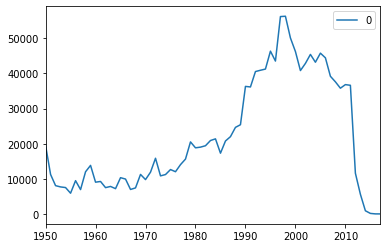

In [11]:
nb.bigram(first = 'i', second = 'Oslo', media='bok').plot()

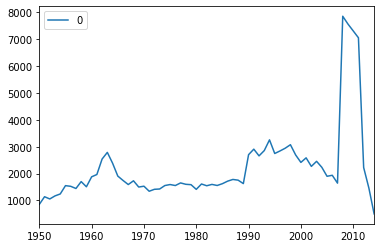

In [13]:
nb.bigram(first = 'alltid', second = 'er', media='avis').plot()

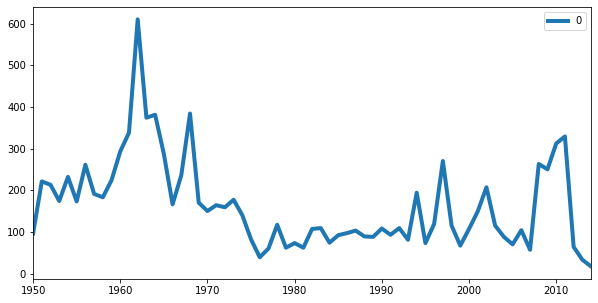

In [5]:
nb.unigram('meslinger', media='avis', ddk="61%").plot(lw=4, figsize=(10,5))

# Bigram

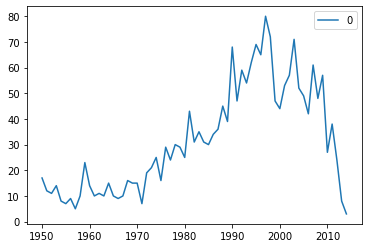

In [6]:
nb.bigram('meslinger','og').plot()

In [7]:
kohort_acc = "meg ham deg oss dem dere henne hverandre"
kohort = "jeg du han hun vi de"

In [8]:
def uni(x):
    df = nb.unigram(x, period=(1930, 2010))
    df.columns = [x]
    return df

In [9]:
def compare(kohort):
    df = pd.concat(map(uni, kohort), axis=1)
    dfsum = df.sum(axis=1)
    return pd.concat([ (df[x]/(dfsum)).rename(x) for x in df], axis=1)

In [10]:
comp_kohort = compare(kohort.split())

In [11]:
comp_acc = compare(kohort_acc.split())

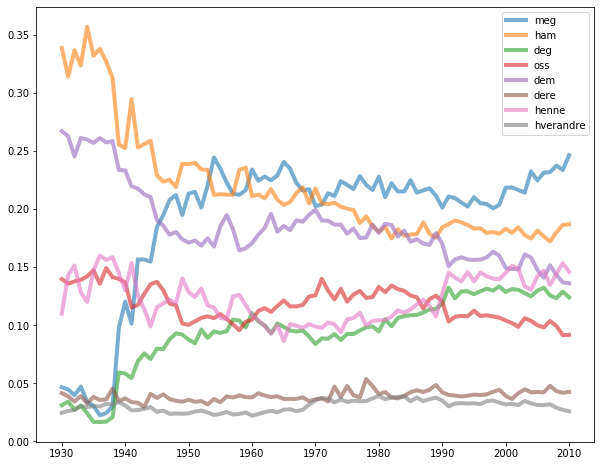

In [12]:
comp_acc.plot(figsize = (10,8), lw = 4, alpha=.6)

In [21]:
c = lambda x: pd.concat([nb.frame(nb.unigram(w, period=(1600, 2000)), w) for w in [y.strip() for y in x.split(",")]], axis=1)

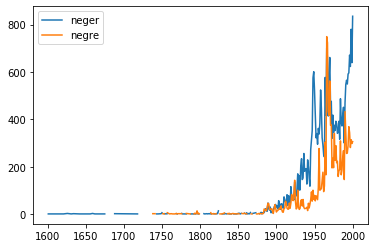

In [26]:
c('neger, negre').plot()

In [ ]:
- Hødnebø 1960 (Norske diplomer til og med år 1300),
- Hødnebø 1966 (Utvalg av norske diplomer 1350--1550),
- Rindal og Halvorsen 2009 (Middelalderbrev fra Ringerike 1263--1570).

In [33]:
nb.book_urn(author = "%HALVORSE%rindal%")

[]

In [6]:
urns = [2009090904028,2011031520003,2016011948059]

In [7]:
nb.metadata(urns)

[[2009090904028,
  '',
  1960,
  'Norske diplomer til og med år 1300',
  '',
  'Selskapet til utgivelse av gamle norske håndskrifter',
  'notfiction',
  '654f28fb0a30617ed98e1a6d4776b66c',
  'mul',
  ''],
 [2016011948059,
  '',
  2009,
  'Middelalderbrev fra Ringerike 1263-1570',
  'originaltekster med oversettelse til moderne norsk',
  'Kolltopp forl.',
  'notfiction',
  'abd2091d1098a8e63691c7a63e921b93',
  'nob',
  '']]

In [8]:
nb.urn_concordance(urns=urns, word="kirken", size=20)

"Norske diplomer til og med år 1300, , 1960",minst kampen og uroen innen,kirken,selv .
"Norske diplomer til og med år 1300, , 1960",herre Bjarne Erlingssons framferd mot,kirken,. Herre Bjarne hadde gått
"Norske diplomer til og med år 1300, , 1960","11 ) , nemlig at",kirken,skulle få sine tiender og
"Norske diplomer til og med år 1300, , 1960",av brevene vedrører innbyrdes-striden i,kirken,", den slo ut særlig"
"Norske diplomer til og med år 1300, , 1960",", nå er kommet under",kirken,", og forbyr bøndene på"
"Norske diplomer til og med år 1300, , 1960","i Oslo , mot at",kirken,får en del andre gårder
"Norske diplomer til og med år 1300, , 1960",til korsbrødrene å rå for,kirken,under erkestolens vakans .
"Norske diplomer til og med år 1300, , 1960",med en halvdel hver til,kirken,"og korsbrødrene , for at"
"Norske diplomer til og med år 1300, , 1960",ved Laf r anz -,kirken,"i Tønsberg , gir en"
"Norske diplomer til og med år 1300, , 1960",", hadde skjenket jorda til",kirken,", og mot at gårdens"
"Norske diplomer til og med år 1300, , 1960",hadde testamentert av gården Vollißennebutil,kirken,og korsbrødrene .


In [13]:
res = nb.sorted_wildcardsearch(
    {
        'word': 'frum*',   # her legges selve søkeordet inn
        'factor':2,           # factor bestemmer hvor mye lenger treffene skal være enn ordet med jokertegn.
        'freq_lim':50,        # sett begrensninger på frekvensen, minimumsverdi
        'limit':50            # begrensning på antall treff
        
    })

data = pd.concat([nb.frame(nb.unigram(x), x) for x in res.index], axis = 1)

In [29]:
nb.unigram('likestilling', media ='avis')

,0
1950,525
1951,751
1952,733
1953,747
1954,917
...,...
2010,6747
2011,6298
2012,2407
2013,2351


In [33]:
nb.concordance(word = 'frumme', kind='panda', corpus='avis')

,urn,before,word,after
0,https://www.nb.no/items/URN:NBN:no-nb_digavis_...,Irak . Disse vil være,frumme,i kveld eller I morgen
1,https://www.nb.no/items/URN:NBN:no-nb_digavis_...,ut på glatta . Vel,frumme,ved brunnstedet trukk de et
2,https://www.nb.no/items/URN:NBN:no-nb_digavis_...,it ta igjen kameraten lenger,frumme,. Lykkelig uvitende om at
3,https://www.nb.no/items/URN:NBN:no-nb_digavis_...,rundt — på lykke og,frumme,med Kjell Edlund . (
4,https://www.nb.no/items/URN:NBN:no-nb_digavis_...,Olav Knutsen og Arthur Wilhelmsen,frumme,og scoret etter meget gode
...,...,...,...,...
70,https://www.nb.no/items/URN:NBN:no-nb_digavis_...,"Ørnencefen , 3 ) ben",frumme,"Øtofc eller fppegointtfen , 4"
71,https://www.nb.no/items/URN:NBN:no-nb_digavis_...,"» gnrer , faint forffjettige-",frumme,"Sinier , faafom Onaler ,"
72,https://www.nb.no/items/URN:NBN:no-nb_digavis_...,- © peiling ' i,frumme,fjjtaffcr . - SE it
73,https://www.nb.no/items/URN:NBN:no-nb_digavis_...,. . . Og Ijané,frumme,gingre übftrafteé meb ben netoøfe


In [34]:
word = "hans, er, ikke"

In [37]:
resultat = pd.DataFrame([w.strip() for w in word.split(',')]).set_index(0)

In [39]:
resultat.index

Index(['hans', 'er', 'ikke'], dtype='object', name=0)

In [49]:
nb.concordance(['feminisme'])

"Lewycka, Marina,kort historie om traktoren i Ukraina,2006",hva min søster synes om,feminisme,.
"Jackson, Michael,store ølboken,1991",. Lenge før kvinnesak og,feminisme,"ble et stridsspørsmål , var"
"Thiis, Jens,Fransk aand og kunst,1939",i et latterlig lys av,feminisme,som « damevenn » .
"Elligers, Anne,Fransk-norsk ordbok,1986",", gi kvinnelig preg .",feminisme,m . kvinnesak ( sbevegelse
"Morgan, Robin,Rainbow Warrior,1986","viktigste kampsak , men også",feminisme,og nasjonal uavhengighet i Stillehavet
